In [1]:
#improting libraries
import cv2
import matplotlib.pyplot as plt 

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,Y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
X_train=X_train/255
x_test=x_test/255

In [5]:
X_train.sum()

72708556.87450942

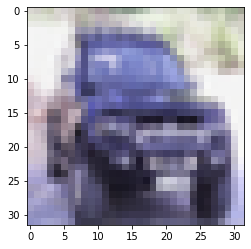

In [6]:
plt.imshow(x_test[9])

In [7]:
x_test[9].shape

(32, 32, 3)

In [8]:
Y_train.sum()

225000

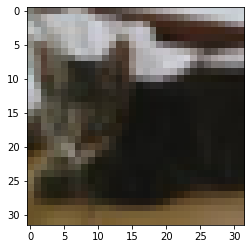

In [9]:
plt.imshow(X_train[9])

In [10]:
X_train[9].shape

(32, 32, 3)

In [11]:
Y_train[9]

array([3], dtype=uint8)

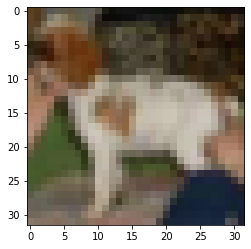

In [12]:
plt.imshow(x_test[12])

In [13]:
y_test[12]

array([5], dtype=uint8)

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Activation,MaxPooling2D

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
Y_train=to_categorical(Y_train,10)
y_test=to_categorical(y_test,10)

# Model

In [18]:
model=Sequential()

In [19]:
shape=(32,32,3)

In [20]:
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))




In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [23]:
model.fit(X_train,Y_train,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4695 - accuracy: 0.4682
Epoch 2/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.0964 - accuracy: 0.6135
Epoch 3/10
1563/1563 [==============================] - 112s 71ms/step - loss: 0.9334 - accuracy: 0.6733
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 0.8252 - accuracy: 0.71 - 109s 70ms/step - loss: 0.8252 - accuracy: 0.7118
Epoch 5/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.7470 - accuracy: 0.7387
Epoch 6/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.6724 - accuracy: 0.7633
Epoch 7/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.6136 - accuracy: 0.7832
Epoch 8/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.5595 - accuracy: 0.8039
Epoch 9/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.5152 - accuracy: 0.8184
Epoch 10/10
1

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.9206 - accuracy: 0.7155


[0.9206447005271912, 0.715499997138977]

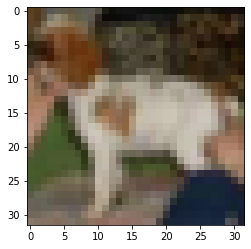

In [28]:
plt.imshow(x_test[12])

In [29]:
y_test[12]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
from sklearn.metrics import classification_report 

In [32]:
prediction=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [35]:
import numpy as np
y_test=np.argmax(y_test,axis=1)

In [36]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1000
           1       0.84      0.85      0.84      1000
           2       0.67      0.55      0.60      1000
           3       0.54      0.52      0.53      1000
           4       0.69      0.66      0.68      1000
           5       0.60      0.65      0.63      1000
           6       0.76      0.78      0.77      1000
           7       0.65      0.85      0.73      1000
           8       0.86      0.76      0.81      1000
           9       0.83      0.76      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000



# Notebook By:Aimen Javed, https://github.com/AimenJaved